# Clustering

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

### Load in the MNIST dataset

The MNIST dataset is used here to visualization. MNIST is an old but popular handwritten dataset that is used for digit classification. The original dataset was published by Yann LeCun which contains 70,000 images of handwritten single-digit numbers between 0 and 9. The images are preprocessed such that the digits are centered, scaled to 28x28 resolution, and a single-channel grayscale image. The original dataset flattens the 28x28 2D-image into a 1D-vector.

In [5]:
# download the full mnist dataset
x_mnist, y_mnist = fetch_openml('mnist_784', version=1, as_frame=False, return_X_y=True)

In [7]:
# print the sizes
print(f'{x_mnist.shape = }')
print(f'{y_mnist.shape = }')

x_mnist.shape = (70000, 784)
y_mnist.shape = (70000,)


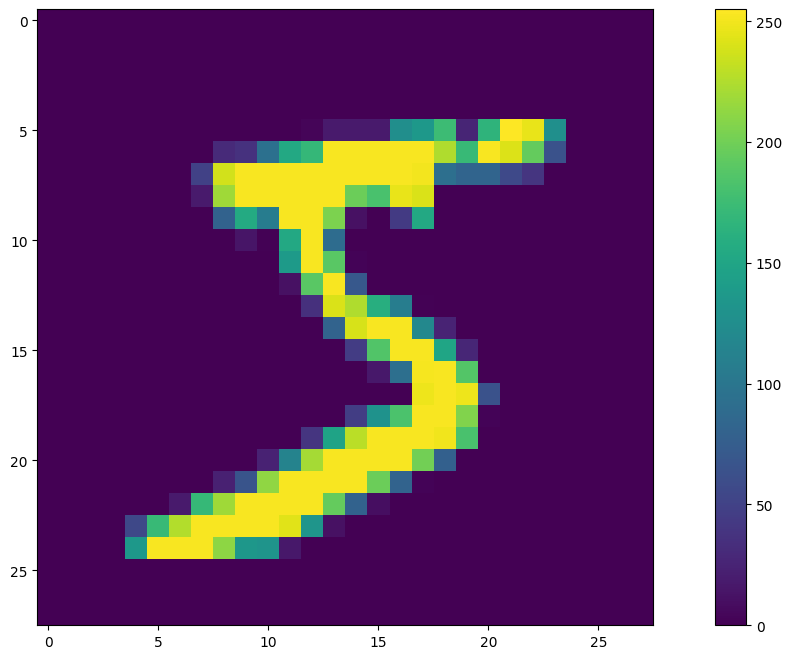

In [12]:
# show the first image
plt.figure(figsize=(16,8))
plt.imshow(x_mnist[0].reshape(28, 28))
plt.colorbar()

,0,1,2,3,4,5,6,7
0,3,0,5,7,7,6,7,3
1,1,2,8,9,1,0,7,7
2,1,3,1,3,9,3,0,2
3,9,7,7,8,4,3,0,2
4,5,8,9,9,2,6,1,3
5,4,7,7,7,1,4,4,7
6,7,0,5,2,9,8,4,1
7,2,6,0,4,6,4,1,5
8,8,8,2,0,7,1,7,3
9,0,6,7,3,7,3,8,1


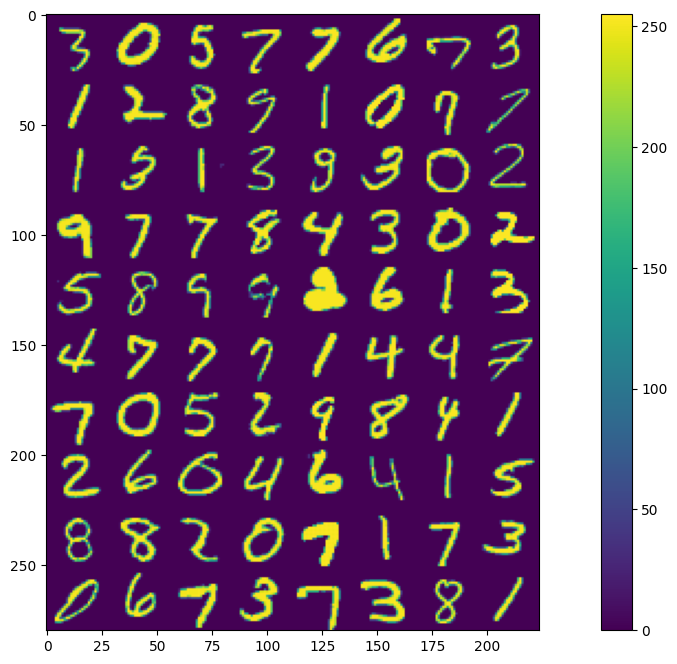

In [45]:
N = 8
M = 10

image_samples = None
image_labels = np.array([])
permuted_array = np.random.permutation(y_mnist.shape[0])

# loop along rows
for m in range(M):
    # loop along columns to generate a single row
    for n in range(N):
        # get a random permutation index
        permute_idx = permuted_array[m*M + n]

        # get image at the permuted index
        image = x_mnist[permute_idx].reshape(28, 28)
        label = y_mnist[permute_idx]

        # generate a single row
        image_samples_row = image if n == 0 else np.hstack((image_samples_row, image))
        # image_labels.append(label)
        image_labels = np.append(image_labels, label)

    # append rows
    image_samples = image_samples_row if image_samples is None else np.vstack((image_samples, image_samples_row))

# show grid of images
plt.figure(figsize=(16,8))
plt.imshow(image_samples)
plt.colorbar()

# show grid of ground truth data
display(pd.DataFrame(image_labels.reshape(M,N)))